In [1]:
import jpype
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# пример генерации массива
arr = np.random.randint(0, 2000000, 100)

for i in range(0, 98, 7):
    print(arr[i:i + 7])


[ 705460  118064 1355318  538921  547235  149910  573799]
[1157601 1343085 1900442 1951590  141487  419451  877383]
[1861583 1985401 1495927 1159147 1168885  206726 1512275]
[1010987  971560  628342  635498 1225271  594801 1319683]
[1578653 1876907 1227900  794564 1092053  422483  320808]
[ 737728 1822845  243947  779029  512304   10642 1687140]
[ 874149 1395566 1195490 1400094 1093665 1285202 1734527]
[ 740724 1071740  361399 1751102  697291 1716620 1171025]
[ 210105   25764  110289  973247  170078 1625244  127146]
[1387595  607355 1338052  784219  914920  411131 1378999]
[1071398 1742978  428863 1320245  403927 1563461  261162]
[1669478  283572  771957  995309 1887562 1991115  690352]
[ 942631 1553201  378981 1700418 1577891  706092 1013200]
[1422182 1654212  962048  877798 1425049 1952813 1467501]


In [3]:
from jpype.types import JInt, JArray

jpype.startJVM(classpath=[".."])

In [4]:
Sorter = jpype.JClass("utils.sorting_algoritms.Sorting")

In [5]:
gnome_method_results = []
bubble_method_results = []
added_method_results = []
element_counts = []
array_100 = []

for elements_count in range(0, 100001, 5000):
    if elements_count == 0:
        elements_count = 100

    element_counts.append(elements_count)

    array = np.random.randint(0, 2000000, elements_count)
    java_array = JArray(JInt)(array)

    if elements_count == 100:
        array_100 = array

    result_gnome_method = Sorter.GnomMethod(java_array)
    gnome_method_results.append((list(result_gnome_method.result), result_gnome_method.iterations, result_gnome_method.timeMs))

    result_bubble_method = Sorter.BubbleMethod(java_array)
    bubble_method_results.append((list(result_bubble_method.result), result_bubble_method.iterations, result_bubble_method.timeMs))

    result_added_method = Sorter.AddedMethod(java_array)
    added_method_results.append((list(result_added_method.result), result_added_method.iterations, result_added_method.timeMs))

In [6]:
gnome_method_arrays = [x[0] for x in gnome_method_results]
gnome_method_iterations = [x[1] for x in gnome_method_results]
gnome_method_times = [x[2] for x in gnome_method_results]

bubble_method_arrays = [x[0] for x in bubble_method_results]
bubble_method_iterations = [x[1] for x in bubble_method_results]
bubble_method_times = [x[2] for x in bubble_method_results]

added_method_arrays = [x[0] for x in added_method_results]
added_method_iterations = [x[1] for x in added_method_results]
added_method_times = [x[2] for x in added_method_results]

In [7]:
import pandas as pd

results_dataframe = pd.DataFrame({
    'Гномий метод число итераций': gnome_method_iterations,
    'Пузырьковый метод число итераций': bubble_method_iterations,
    'Метод вставки число итераций': added_method_iterations,
    'Гномий метод время сортировки (мс)': gnome_method_times,
    'Пузырьковый метод время сортировки (мс)': bubble_method_times,
    'Метод вставки время сортировки (мс)': added_method_times,
}, index=element_counts)

results_dataframe

,Гномий метод число итераций,Пузырьковый метод число итераций,Метод вставки число итераций,Гномий метод время сортировки (мс),Пузырьковый метод время сортировки (мс),Метод вставки время сортировки (мс)
100,4532,5049,99,0.3184,0.2509,0.0048
5000,12617634,12502499,4999,19.9114,8.3920,0.1810
10000,50399288,50004999,9999,62.5281,22.1841,0.3425
15000,112210482,112507499,14999,94.6464,18.6864,0.5459
20000,199586160,200009999,19999,156.7344,33.5235,0.6453
25000,311264188,312512499,24999,236.3974,51.6082,0.8318
30000,447942314,450014999,29999,341.8498,73.8244,0.1607
35000,612698582,612517499,34999,471.7630,113.3912,0.1797
40000,803029636,800019999,39999,623.5951,131.4628,0.1137
45000,1012156020,1012522499,44999,802.9001,172.2402,0.0094


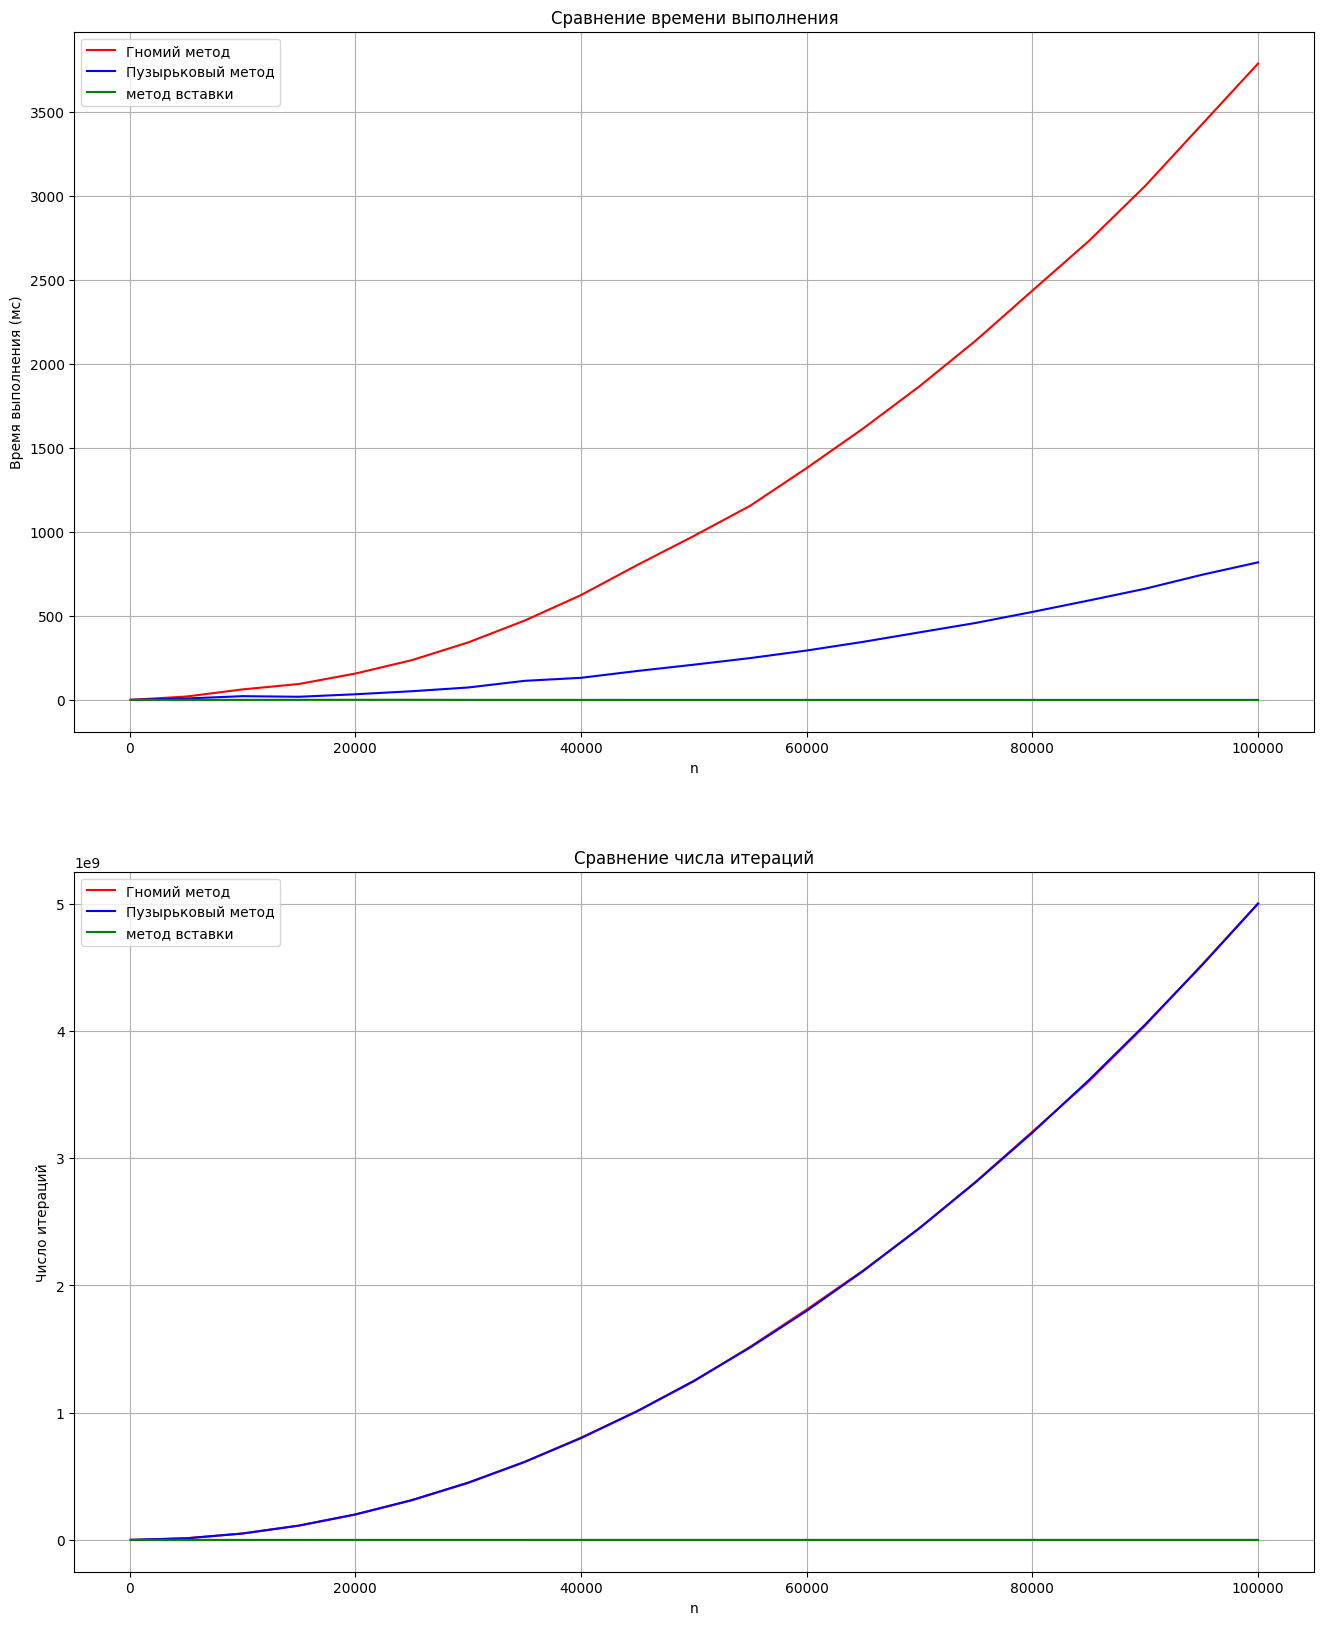

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 20)) 

axs[0].plot(element_counts, gnome_method_times, label='Гномий метод', color='red')
axs[0].plot(element_counts, bubble_method_times, label='Пузырьковый метод', color='blue')
axs[0].plot(element_counts, added_method_times, label='метод вставки', color='green')

axs[0].set_xlabel('n')  
axs[0].set_ylabel('Время выполнения (мс)')
axs[0].set_title('Сравнение времени выполнения')

axs[0].legend()
axs[0].grid(True)


axs[1].plot(element_counts, gnome_method_iterations, label='Гномий метод', color='red')
axs[1].plot(element_counts, bubble_method_iterations, label='Пузырьковый метод', color='blue')
axs[1].plot(element_counts, added_method_iterations, label='метод вставки', color='green')

axs[1].set_xlabel('n')  
axs[1].set_ylabel('Число итераций')
axs[1].set_title('Сравнение числа итераций')

axs[1].legend()
axs[1].grid(True)


plt.show()

In [9]:
# исходный массив
for i in range(0, 100, 7):
    print(array_100[i:i + 7])

[ 902561  561945 1581789  482347  364141   70157  274395]
[1034680 1026126  962747 1330210  177421  830618    3833]
[  25319  859121  847522  575315  859866 1445180  998276]
[  57609  737503  542421   96232 1811200  989181 1885852]
[ 609483 1778612 1129981 1705859 1517127 1766635 1239135]
[ 430910  991912  800593 1542973  110618  471319  515213]
[  73683  452285 1465049  433945 1650679 1005325 1516475]
[ 915669 1053900 1805945 1906701  188560  520756 1261667]
[ 458077 1926490   91616  371872 1964900  263766 1310416]
[ 246451  520228 1391981  390745  662987  650976 1896491]
[1051842 1948145  543452 1670247 1686105  193324 1391916]
[ 759688  513181 1436819 1007996 1042830  751701 1808447]
[ 504968 1968904 1091527  381685  992766  217464 1865809]
[1863940 1042128  485948 1088852 1274437 1479735 1100910]
[  3261 424168]


In [10]:
# отсортированный питоном
for i in range(0, 100, 7):
    array_100.sort()
    print(array_100[i:i + 7])

[ 3261  3833 25319 57609 70157 73683 91616]
[ 96232 110618 177421 188560 193324 217464 246451]
[263766 274395 364141 371872 381685 390745 424168]
[430910 433945 452285 458077 471319 482347 485948]
[504968 513181 515213 520228 520756 542421 543452]
[561945 575315 609483 650976 662987 737503 751701]
[759688 800593 830618 847522 859121 859866 902561]
[ 915669  962747  989181  991912  992766  998276 1005325]
[1007996 1026126 1034680 1042128 1042830 1051842 1053900]
[1088852 1091527 1100910 1129981 1239135 1261667 1274437]
[1310416 1330210 1391916 1391981 1436819 1445180 1465049]
[1479735 1516475 1517127 1542973 1581789 1650679 1670247]
[1686105 1705859 1766635 1778612 1805945 1808447 1811200]
[1863940 1865809 1885852 1896491 1906701 1926490 1948145]
[1964900 1968904]


In [11]:
# Гномий метод
for i in range(0, 100, 7):
    print(gnome_method_arrays[0][i:i + 7])

[3261, 3833, 25319, 57609, 70157, 73683, 91616]
[96232, 110618, 177421, 188560, 193324, 217464, 246451]
[263766, 274395, 364141, 371872, 381685, 390745, 424168]
[430910, 433945, 452285, 458077, 471319, 482347, 485948]
[504968, 513181, 515213, 520228, 520756, 542421, 543452]
[561945, 575315, 609483, 650976, 662987, 737503, 751701]
[759688, 800593, 830618, 847522, 859121, 859866, 902561]
[915669, 962747, 989181, 991912, 992766, 998276, 1005325]
[1007996, 1026126, 1034680, 1042128, 1042830, 1051842, 1053900]
[1088852, 1091527, 1100910, 1129981, 1239135, 1261667, 1274437]
[1310416, 1330210, 1391916, 1391981, 1436819, 1445180, 1465049]
[1479735, 1516475, 1517127, 1542973, 1581789, 1650679, 1670247]
[1686105, 1705859, 1766635, 1778612, 1805945, 1808447, 1811200]
[1863940, 1865809, 1885852, 1896491, 1906701, 1926490, 1948145]
[1964900, 1968904]


In [12]:
# Пузырьковый метод
for i in range(0, 100, 7):
    print(bubble_method_arrays[0][i:i + 7])

[3261, 3833, 25319, 57609, 70157, 73683, 91616]
[96232, 110618, 177421, 188560, 193324, 217464, 246451]
[263766, 274395, 364141, 371872, 381685, 390745, 424168]
[430910, 433945, 452285, 458077, 471319, 482347, 485948]
[504968, 513181, 515213, 520228, 520756, 542421, 543452]
[561945, 575315, 609483, 650976, 662987, 737503, 751701]
[759688, 800593, 830618, 847522, 859121, 859866, 902561]
[915669, 962747, 989181, 991912, 992766, 998276, 1005325]
[1007996, 1026126, 1034680, 1042128, 1042830, 1051842, 1053900]
[1088852, 1091527, 1100910, 1129981, 1239135, 1261667, 1274437]
[1310416, 1330210, 1391916, 1391981, 1436819, 1445180, 1465049]
[1479735, 1516475, 1517127, 1542973, 1581789, 1650679, 1670247]
[1686105, 1705859, 1766635, 1778612, 1805945, 1808447, 1811200]
[1863940, 1865809, 1885852, 1896491, 1906701, 1926490, 1948145]
[1964900, 1968904]


In [13]:
# Метод вставки
for i in range(0, 100, 7):
    print(added_method_arrays[0][i:i + 7])

[3261, 3833, 25319, 57609, 70157, 73683, 91616]
[96232, 110618, 177421, 188560, 193324, 217464, 246451]
[263766, 274395, 364141, 371872, 381685, 390745, 424168]
[430910, 433945, 452285, 458077, 471319, 482347, 485948]
[504968, 513181, 515213, 520228, 520756, 542421, 543452]
[561945, 575315, 609483, 650976, 662987, 737503, 751701]
[759688, 800593, 830618, 847522, 859121, 859866, 902561]
[915669, 962747, 989181, 991912, 992766, 998276, 1005325]
[1007996, 1026126, 1034680, 1042128, 1042830, 1051842, 1053900]
[1088852, 1091527, 1100910, 1129981, 1239135, 1261667, 1274437]
[1310416, 1330210, 1391916, 1391981, 1436819, 1445180, 1465049]
[1479735, 1516475, 1517127, 1542973, 1581789, 1650679, 1670247]
[1686105, 1705859, 1766635, 1778612, 1805945, 1808447, 1811200]
[1863940, 1865809, 1885852, 1896491, 1906701, 1926490, 1948145]
[1964900, 1968904]


In [14]:
jpype.shutdownJVM()